In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("water_quality_week1.csv")
print("Sample Data:")
display(df.head())

Sample Data:


,pH,Turbidity(NTU),Dissolved_Oxygen(mg/L),Temperature(°C),Conductivity(µS/cm),Nitrate(mg/L),Chloride(mg/L),Coliform_Count(CFU/100mL),Contamination
0,7.2,1.1,8.5,25,450,2.1,35,5,0
1,6.8,2.5,7.9,26,510,3.0,40,20,0
2,6.5,4.0,6.8,28,600,5.5,60,150,1
3,7.4,1.3,8.2,24,430,1.8,32,8,0
4,8.1,0.8,9.0,22,390,0.5,25,2,0


In [3]:
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   pH                         10 non-null     float64
 1   Turbidity(NTU)             10 non-null     float64
 2   Dissolved_Oxygen(mg/L)     10 non-null     float64
 3   Temperature(°C)            10 non-null     int64  
 4   Conductivity(µS/cm)        10 non-null     int64  
 5   Nitrate(mg/L)              10 non-null     float64
 6   Chloride(mg/L)             10 non-null     int64  
 7   Coliform_Count(CFU/100mL)  10 non-null     int64  
 8   Contamination              10 non-null     int64  
dtypes: float64(4), int64(5)
memory usage: 852.0 bytes
None

Missing Values:
pH                           0
Turbidity(NTU)               0
Dissolved_Oxygen(mg/L)       0
Temperature(°C)              0
Conductivity(µS/cm)          0
Nitrate(mg/L)                0
Chlor

In [4]:
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,pH,Turbidity(NTU),Dissolved_Oxygen(mg/L),Temperature(°C),Conductivity(µS/cm),Nitrate(mg/L),Chloride(mg/L),Coliform_Count(CFU/100mL),Contamination
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,6.880000,3.140000,7.260000,26.50000,545.000000,4.180000,48.300000,84.400000,0.400000
std,0.692499,2.368403,1.493839,3.02765,132.936911,3.043317,19.658473,98.488804,0.516398
min,5.900000,0.800000,4.800000,22.00000,390.000000,0.500000,25.000000,2.000000,0.000000
25%,6.350000,1.150000,6.200000,24.25000,435.000000,1.875000,32.750000,5.750000,0.000000
50%,6.900000,2.250000,7.700000,26.50000,505.000000,3.250000,42.500000,22.500000,0.000000
75%,7.350000,4.900000,8.425000,28.75000,660.000000,6.625000,66.000000,172.500000,1.000000
max,8.100000,7.000000,9.000000,31.00000,750.000000,9.000000,80.000000,250.000000,1.000000


In [5]:
df = df.fillna(df.mean())

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop("Contamination", axis=1))
scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df["Contamination"] = df["Contamination"]

print("\nScaled Dataset:")
display(scaled_df.head())



Scaled Dataset:


,pH,Turbidity(NTU),Dissolved_Oxygen(mg/L),Temperature(°C),Conductivity(µS/cm),Nitrate(mg/L),Chloride(mg/L),Coliform_Count(CFU/100mL),Contamination
0,0.590909,0.048387,0.880952,0.333333,0.166667,0.188235,0.181818,0.012097,0
1,0.409091,0.274194,0.738095,0.444444,0.333333,0.294118,0.272727,0.072581,0
2,0.272727,0.516129,0.476190,0.666667,0.583333,0.588235,0.636364,0.596774,1
3,0.681818,0.080645,0.809524,0.222222,0.111111,0.152941,0.127273,0.024194,0
4,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


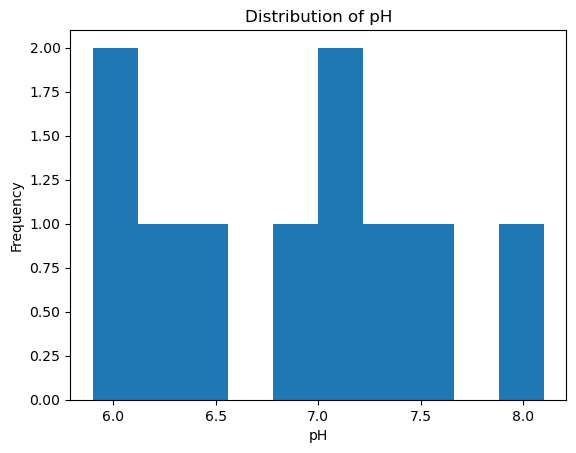

In [7]:
plt.hist(df['pH'], bins=10)
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.title("Distribution of pH")
plt.show()

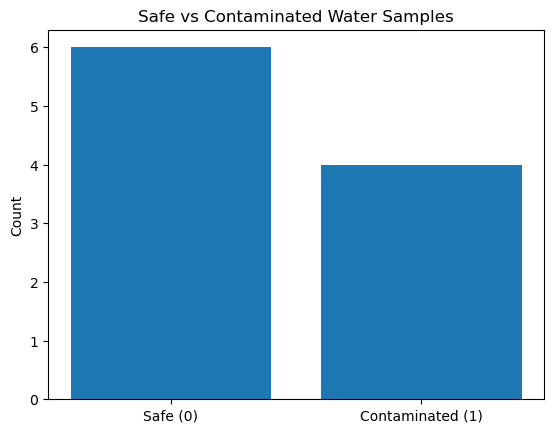

In [8]:
contam_counts = df["Contamination"].value_counts()
plt.bar(contam_counts.index, contam_counts.values)
plt.xticks([0,1], ["Safe (0)", "Contaminated (1)"])
plt.ylabel("Count")
plt.title("Safe vs Contaminated Water Samples")
plt.show()

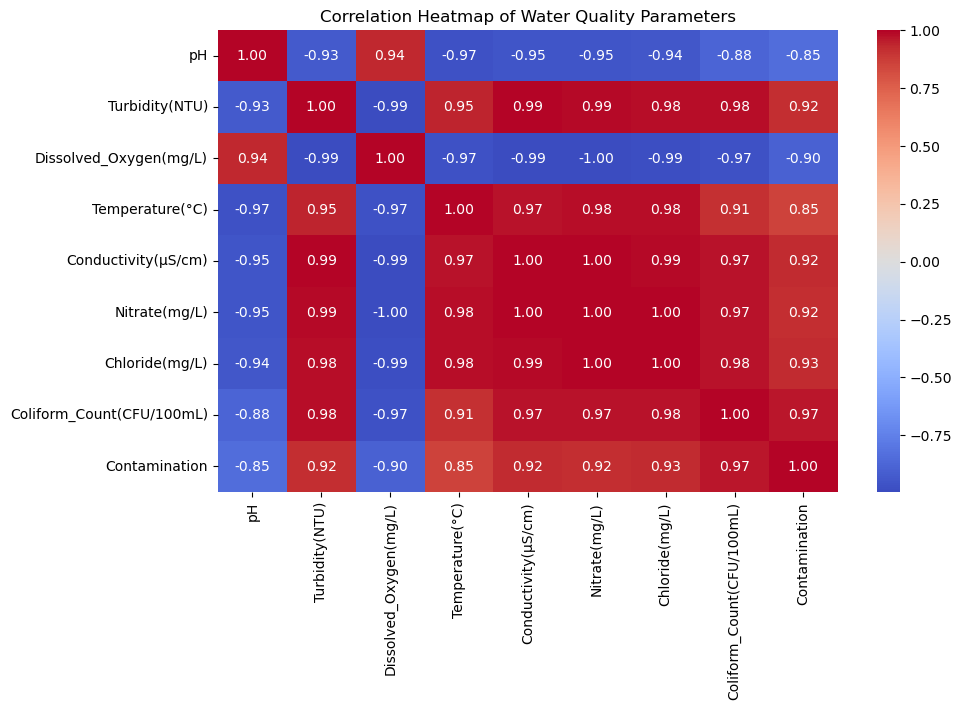

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Water Quality Parameters")
plt.show()